**Airline Passenger Satisfaction Prediction**

**Name:** Yahya Parayil

**Organization:** Entri Elevate

**Date:** 10-Feb-2026


**Overview of Problem Statement:**

In the airline industry, passenger satisfaction is directly linked to
Customer loyalty,Brand reputation,Revenue growth etc.
so, passenger satisfaction depends on multiple service-related factors such as In-flight service,Seat comfort,Delay time and ofcourse Staff behavior.

Manually analyzing thousands of passenger feedback records is difficult and time-consuming.
Therefore, Machine Learning can be used to automatically predict whether a passenger is satisfied or not.


**Objective**

To build and evaluate the best machine learning classification model that can accurately predict passenger satisfaction based on service and travel-related features.

**Data Description:**
   - Dataset Name: Airline Passenger Satisfaction
   - Type: Classification
   - Source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
   - Target Variable: Satisfaction
   - Features:
      * Gender
      * Customer Type
      * Age
      * Type of Travel
      * Class
      * Inflight service
      * Seat comfort
      * Cleanliness
      * Food and drink
      * Online boarding
      * Baggage handling
      * Check-in service
      * Flight Information
      * Flight distance
      * Departure delay
      * Arrival delay


**Data Collection**

We import the dataset and perform initial inspection to understand:
* Data types
* Missing values
* Data size

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


This step helps us understand the structure and quality of our dataset before applying ML.

**Data Preprocessing – Data Cleaning**

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


* Handling Missing Values

In [ ]:

df.isnull().sum()

df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

df.isnull().sum()


/tmp/ipython-input-3961854643.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


🔹 Outlier Detection

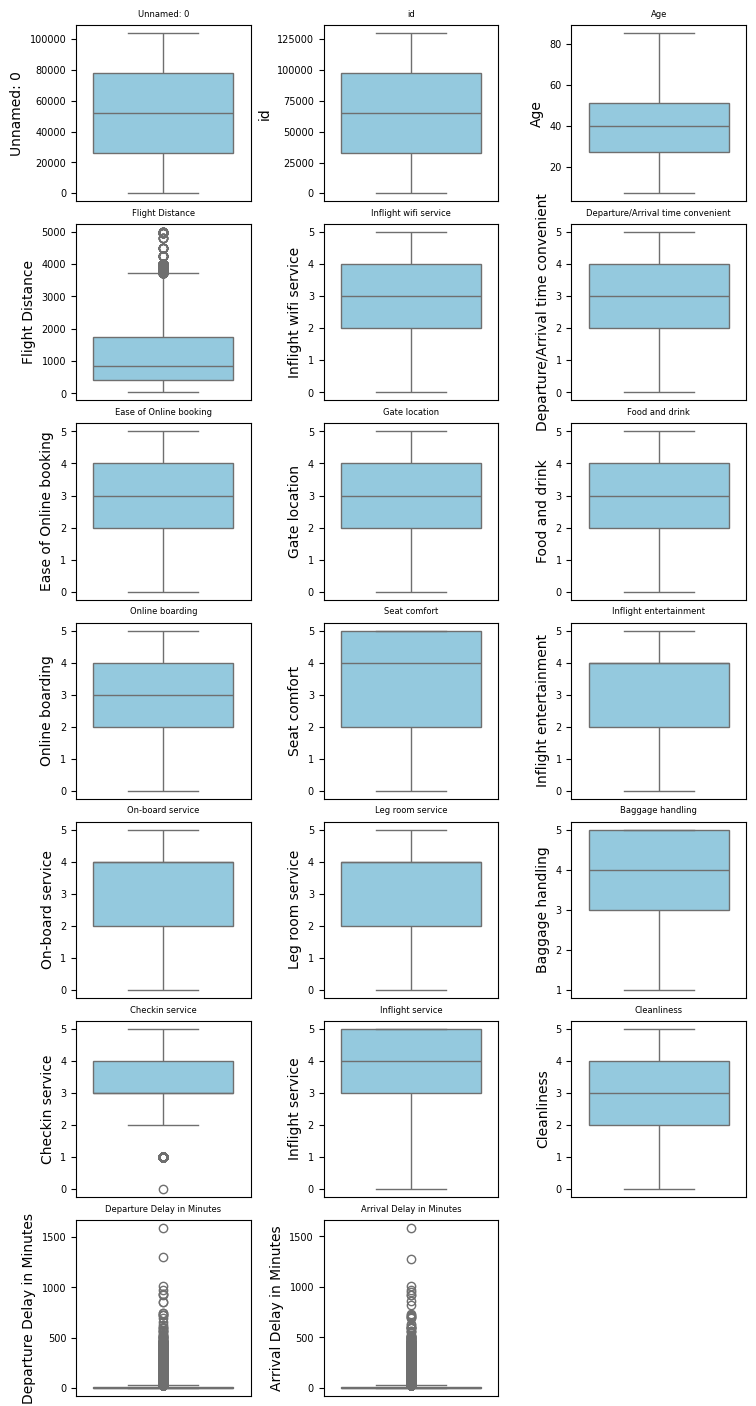

Unnamed: 0: 0 potential outliers
id: 0 potential outliers
Age: 0 potential outliers
Flight Distance: 2291 potential outliers
Inflight wifi service: 0 potential outliers
Departure/Arrival time convenient: 0 potential outliers
Ease of Online booking: 0 potential outliers
Gate location: 0 potential outliers
Food and drink: 0 potential outliers
Online boarding: 0 potential outliers
Seat comfort: 0 potential outliers
Inflight entertainment: 0 potential outliers
On-board service: 0 potential outliers
Leg room service: 0 potential outliers
Baggage handling: 0 potential outliers
Checkin service: 12891 potential outliers
Inflight service: 0 potential outliers
Cleanliness: 0 potential outliers
Departure Delay in Minutes: 14529 potential outliers
Arrival Delay in Minutes: 13954 potential outliers


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3  # number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # auto-calculate rows

plt.figure(figsize=(n_cols*2.5, n_rows*2))  # small compact plots

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=6)
    plt.xticks([])
    plt.yticks(fontsize=7)

plt.tight_layout(pad=0.5)
plt.show()

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outliers = series[(series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)]
    return len(outliers)

for col in num_cols:
    print(f"{col}: {count_outliers(df[col])} potential outliers")

🔹 Skewness Handling

In [ ]:
import numpy as np
df['Flight Distance'] = np.log1p(df['Flight Distance'])


Removes the id column because its no longer needed,
and it has no relation with the target column

In [ ]:
df.drop(columns=['id'], inplace=True)
df.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,6.133398,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,5.463832,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,7.041412,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,6.333280,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,5.370638,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
import numpy as np

df['Arrival Delay Log'] = np.log1p(df['Arrival Delay in Minutes'])
df['Departure Delay Log'] = np.log1p(df['Departure Delay in Minutes'])

**Handling Outlier using Log transformation**

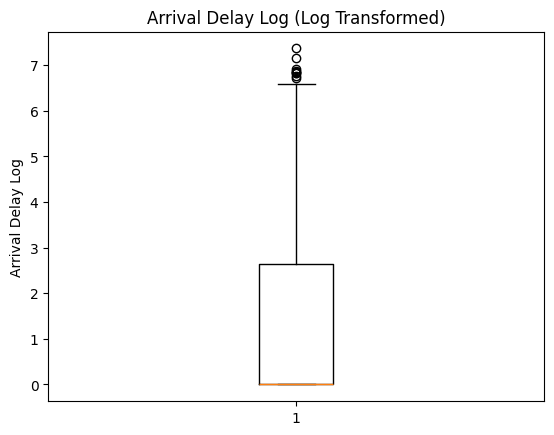

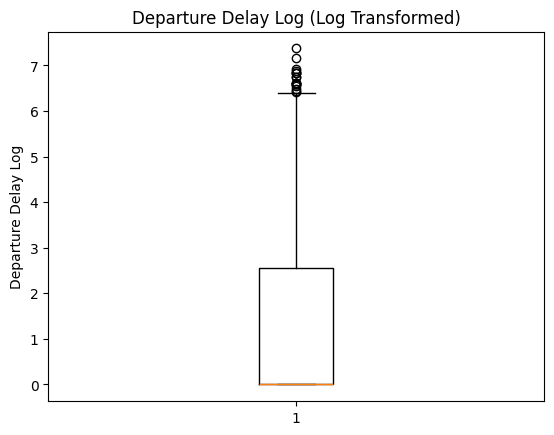

In [ ]:
log_cols = ['Arrival Delay Log', 'Departure Delay Log']

for col in log_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"{col} (Log Transformed)")
    plt.ylabel(col)
    plt.show()


**Exploratory Data Analysis (EDA)**

Purpose of EDA :
helps to find,
* What affects satisfaction most
* Patterns in passenger behavior

🔹Satisfaction Distribution

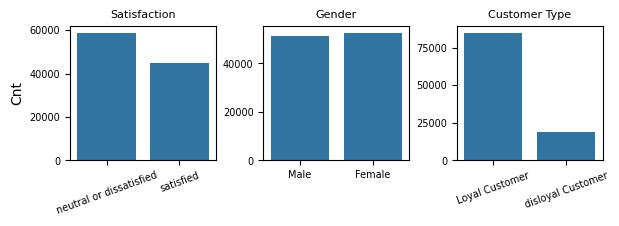

In [ ]:
plt.figure(figsize=(8,2.2))

plt.subplot(1,4,1)
sns.countplot(x='satisfaction', data=df)
plt.title('Satisfaction', fontsize=8)
plt.xlabel("")
plt.ylabel("Cnt")
plt.xticks(rotation=20,fontsize=7)
plt.yticks(fontsize=7)

plt.subplot(1,4,2)
sns.countplot(x='Gender', data=df)
plt.title('Gender', fontsize=8)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.subplot(1,4,3)
sns.countplot(x='Customer Type', data=df)
plt.title('Customer Type', fontsize=8)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=20, fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout(pad=0.5)
plt.show()

🔹Satisfaction vs Class


<Axes: xlabel='Class', ylabel='count'>

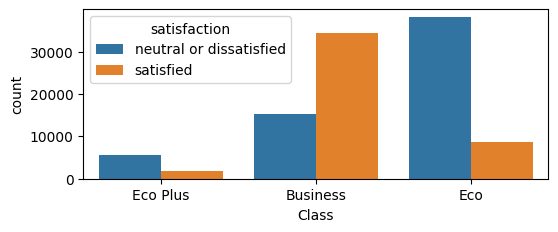

In [ ]:
plt.figure(figsize=(6,2.2))
sns.countplot(x='Class', hue='satisfaction', data=df)

🔹 Histogram (Distribution)

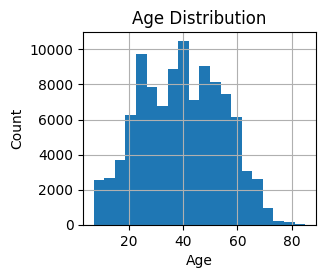

In [ ]:
plt.figure(figsize=(3,2.5))
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

🔹 Bar Plot – Average Ratings by Satisfaction

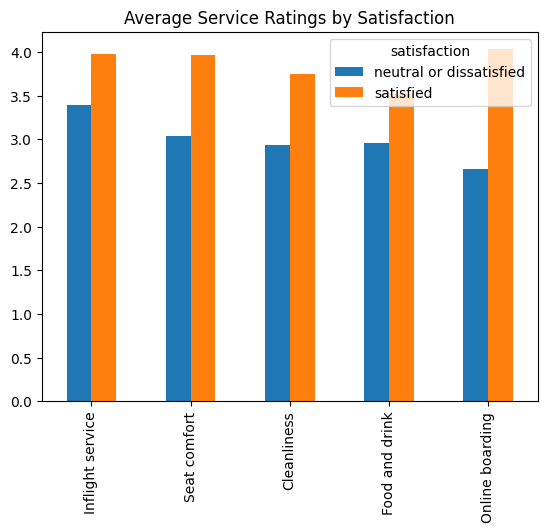

In [ ]:
service_cols = [
    'Inflight service', 'Seat comfort', 'Cleanliness',
    'Food and drink', 'Online boarding'
]

df.groupby('satisfaction')[service_cols].mean().T.plot(kind='bar')
plt.title("Average Service Ratings by Satisfaction")
plt.show()

🔹Heatmap Correlation

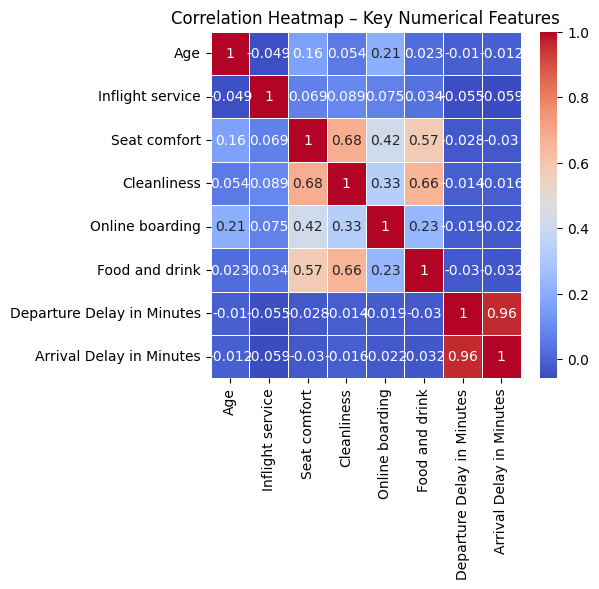

In [ ]:
plt.figure(figsize=(5,4.5))
essential_cols = [
    'Age',
    'Inflight service',
    'Seat comfort',
    'Cleanliness',
    'Online boarding',
    'Food and drink',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

corr = df[essential_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title("Correlation Heatmap – Key Numerical Features")
plt.show()



**Feature Engineering**

ML models require numerical input,so lets encode the categorical input in our dataset.
The object columns in our dataset are :
Gender,
Customer,
Class,
Satisfaction.

We convert text into numbers so the machine can understand it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['satisfaction'] = le.fit_transform(df['satisfaction'])

class_mapping = {
    'Eco': 0,
    'Eco Plus': 1,
    'Business': 2
}

df['Class'] = df['Class'].map(class_mapping)

df.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Arrival Delay Log,Departure Delay Log
0,0,1,0,13,1,1,6.133398,3,4,3,...,3,4,4,5,5,25,18.0,0,2.944439,3.258097
1,1,1,1,25,0,2,5.463832,3,2,3,...,5,3,1,4,1,1,6.0,0,1.945910,0.693147
2,2,0,0,26,0,2,7.041412,2,2,2,...,3,4,4,4,5,0,0.0,1,0.000000,0.000000
3,3,0,0,25,0,2,6.333280,2,5,5,...,5,3,1,4,2,11,9.0,0,2.302585,2.484907
4,4,1,0,61,0,2,5.370638,3,3,3,...,4,4,3,3,3,0,0.0,1,0.000000,0.000000


**Feature Selection**

* Reduce complexity
* Improve accuracy
* Remove redundant features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_

Service-related features are more important than passenger demographics.

**Train-Test Split**

We train on past data and test on unseen passengers.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Feature Scaling**

Needed for distance-based models like KNN & SVM.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Feature Importance
* Using Random classifier to finalise which feature was useful for the passenger to be satisfied

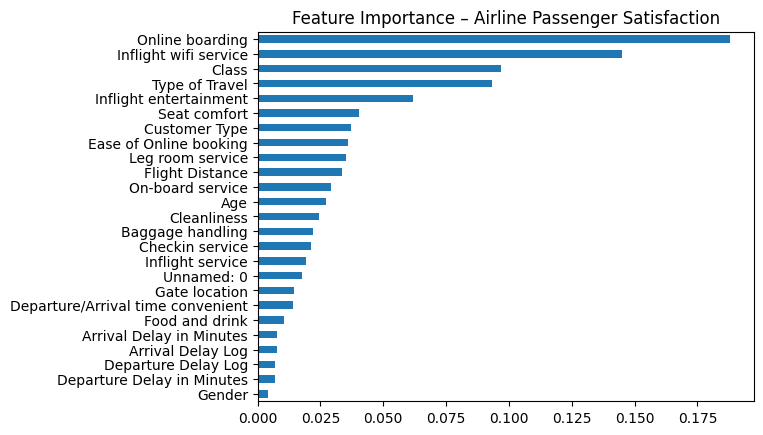

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(importances, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.title("Feature Importance – Airline Passenger Satisfaction")
plt.show()

**Build ML Models (Classification)**

Models Implemented:

  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize the model
# We increase max_iter to 1000 to ensure the algorithm converges on this large dataset
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Fit the model on training data
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# 2. Testing Metrics
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"--- Logistic Regression Performance ---")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

--- Logistic Regression Performance ---
Accuracy : 0.8771
Precision: 0.8740
Recall   : 0.8394
F1-Score : 0.8564


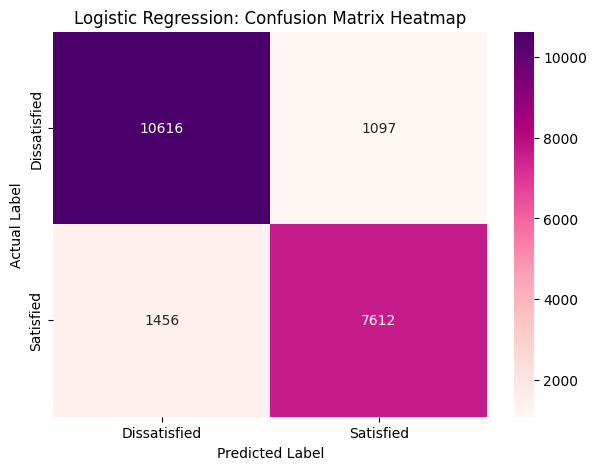

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plotting
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Logistic Regression: Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Insight: Look at the 'False Positives' (Top-Right).
# These are passengers we thought were happy but actually weren't.

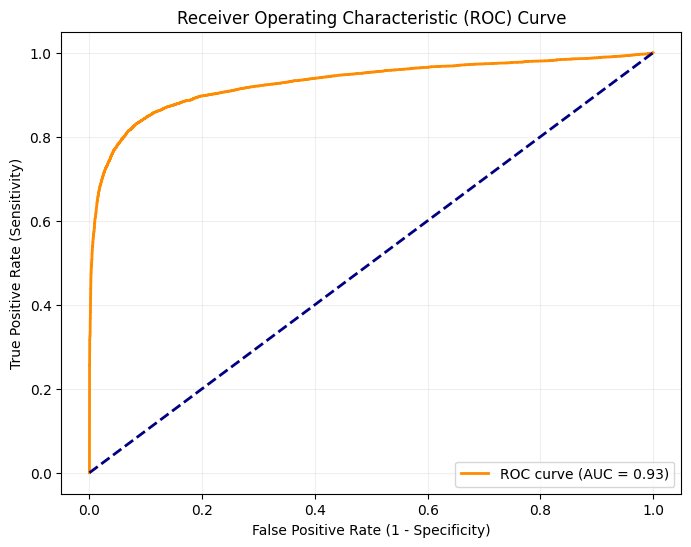

In [ ]:
from sklearn.metrics import roc_curve, auc

# 1. Get prediction probabilities
y_probs = lr_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()

KNN

In [ ]:
#gemini sample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize and Fit KNN
# n_neighbors=5 is a standard starting point
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 2. Predict
y_pred_knn = knn.predict(X_test)

# 3. Print Results
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9250276695057985


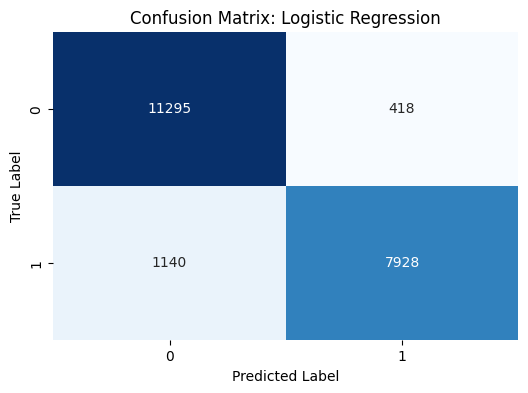

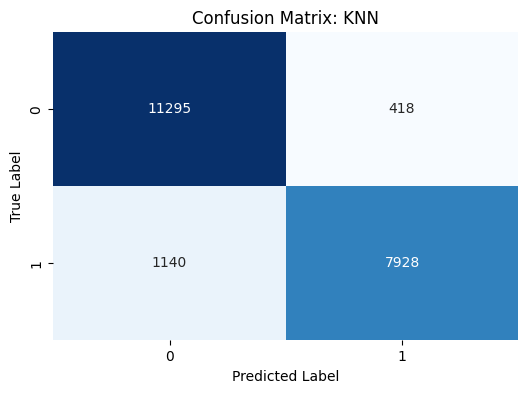

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Visualize for both
plot_confusion_matrix(y_test, y_pred_knn, "Logistic Regression") # From your previous code
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

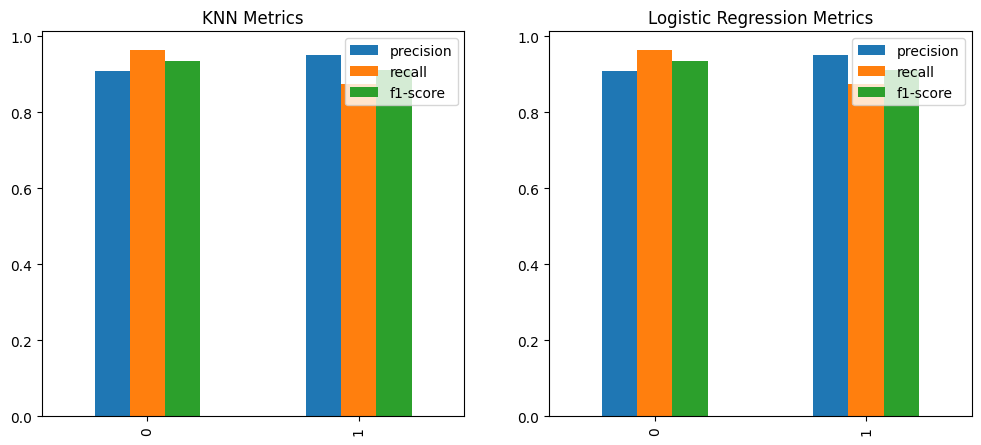

In [ ]:
import pandas as pd

def get_report_df(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    return df.iloc[:2, :3] # Only get '0' and '1' classes and main metrics

# Plotting the comparison
knn_report = get_report_df(y_test, y_pred_knn, "KNN")
lr_report = get_report_df(y_test, y_pred_knn, "Logistic Regression")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
knn_report.plot(kind='bar', ax=ax[0], title="KNN Metrics")
lr_report.plot(kind='bar', ax=ax[1], title="Logistic Regression Metrics")
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the model
# max_depth=5 helps keep the tree interpretable and prevents overfitting
dt_model = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

# 2. Fit the model
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Predict
y_pred_dt = dt_model.predict(X_test)

# 2. Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"--- Decision Tree Performance ---")
print(f"Accuracy : {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall   : {rec_dt:.4f}")
print(f"F1-Score : {f1_dt:.4f}")

--- Decision Tree Performance ---
Accuracy : 0.9051
Precision: 0.8944
Recall   : 0.8872
F1-Score : 0.8908


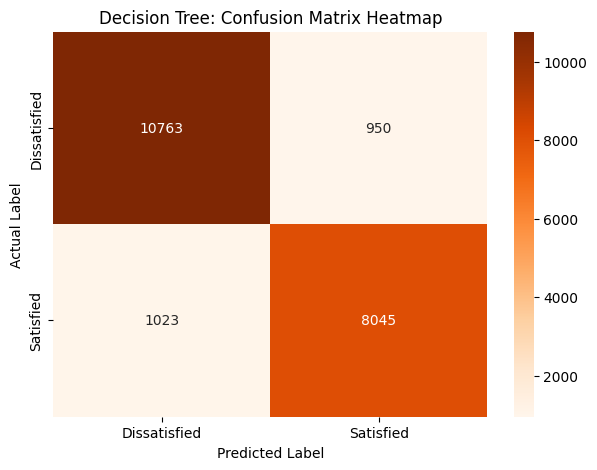

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Decision Tree: Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

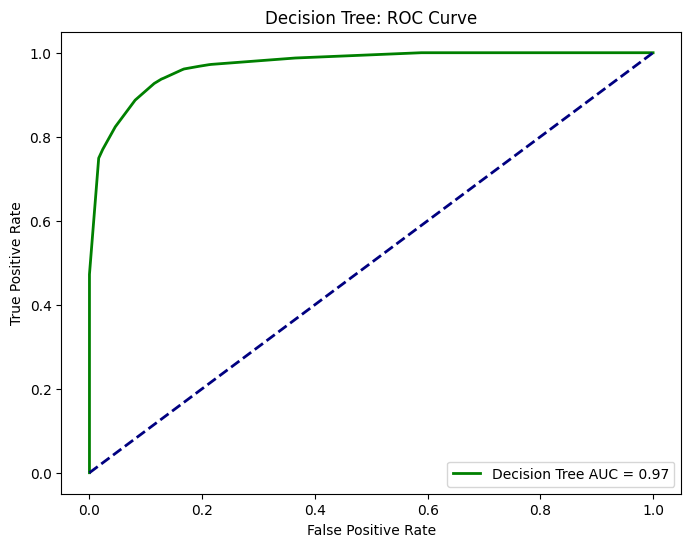

In [ ]:
from sklearn.metrics import roc_curve, auc

# 1. Get probabilities
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree: ROC Curve')
plt.legend(loc="lower right")
plt.show()

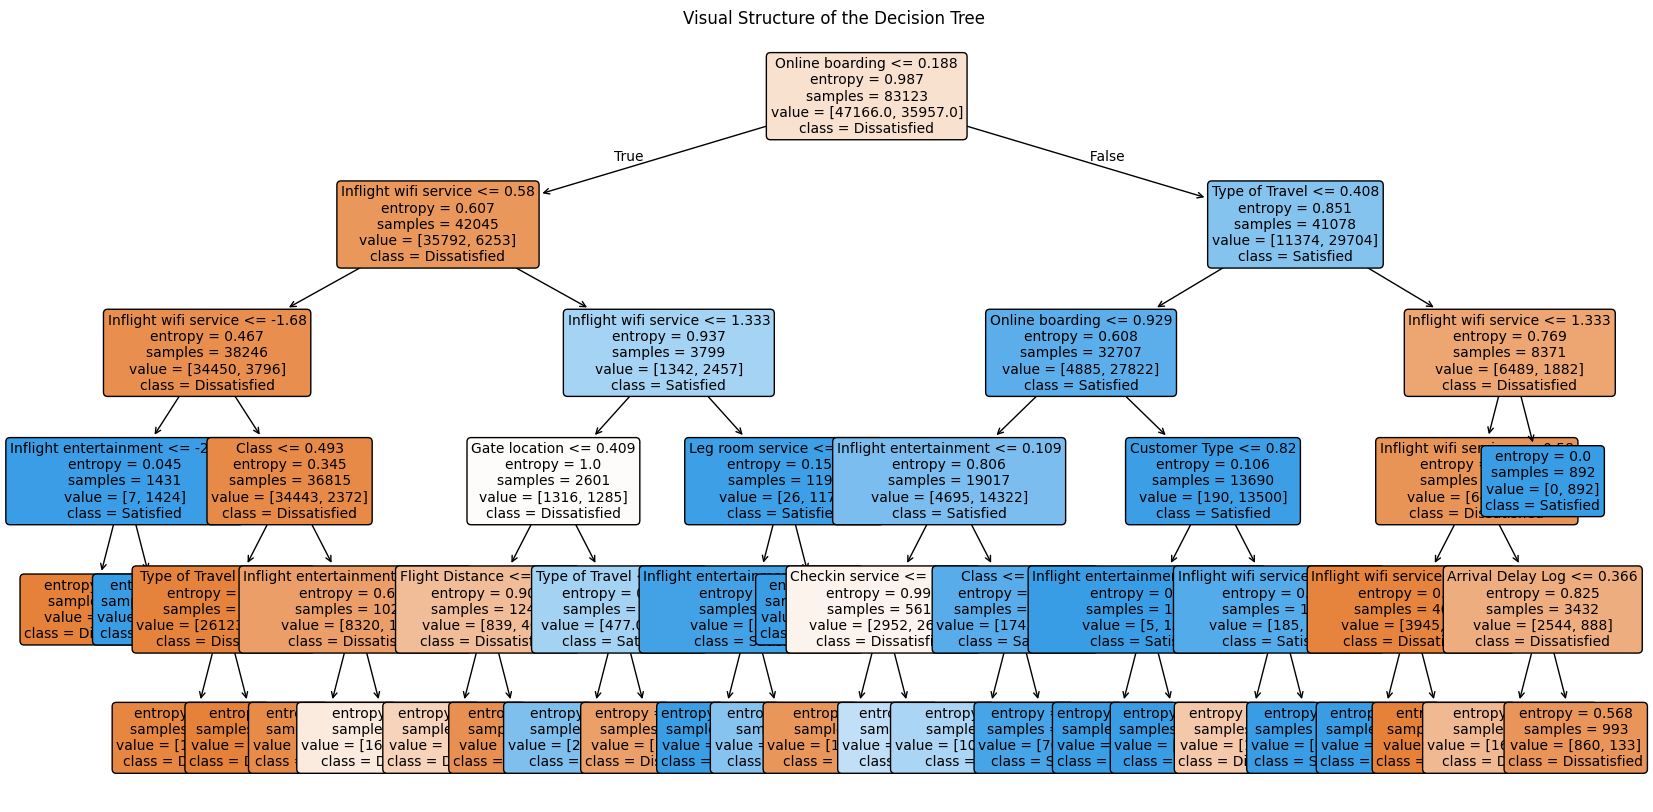

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Dissatisfied', 'Satisfied'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visual Structure of the Decision Tree")
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the model
# n_estimators: number of trees in the forest
# random_state: ensures the results are reproducible
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Fit the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Predict
y_pred_rf = rf_model.predict(X_test)

# 2. Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"--- Random Forest Performance ---")
print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall   : {rec_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")

--- Random Forest Performance ---
Accuracy : 0.9471
Precision: 0.9485
Recall   : 0.9291
F1-Score : 0.9387


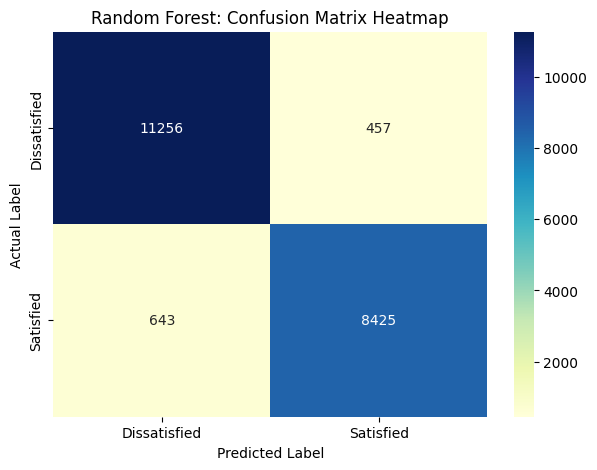

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Random Forest: Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

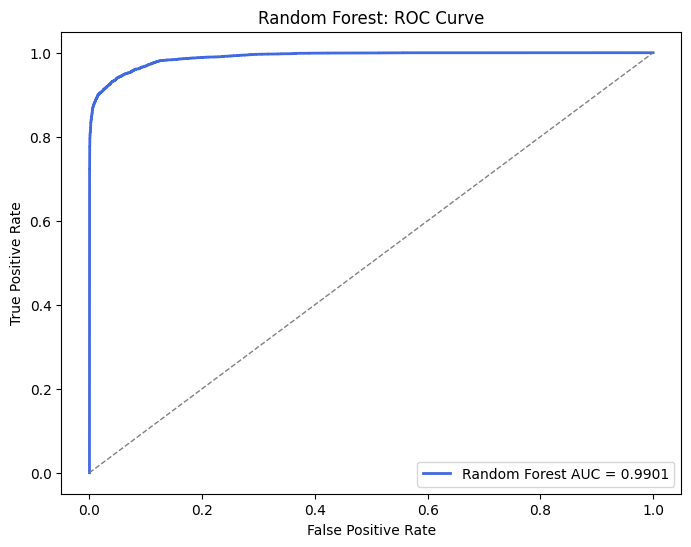

In [ ]:
from sklearn.metrics import roc_curve, auc

# 1. Get probabilities
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='royalblue', lw=2, label=f'Random Forest AUC = {roc_auc_rf:.4f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC Curve')
plt.legend(loc="lower right")
plt.show()

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Initialize the model
# n_estimators=100 means we are building 100 sequential trees
# learning_rate=0.1 controls how much each tree contributes
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Fit the model
gb_model.fit(X_train, y_train)

print("Gradient Boosting model trained successfully.")

Gradient Boosting model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Predict
y_pred_gb = gb_model.predict(X_test)

# 2. Metrics
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
rec_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"--- Gradient Boosting Performance ---")
print(f"Accuracy : {acc_gb:.4f}")
print(f"Precision: {prec_gb:.4f}")
print(f"Recall   : {rec_gb:.4f}")
print(f"F1-Score : {f1_gb:.4f}")

--- Gradient Boosting Performance ---
Accuracy : 0.9420
Precision: 0.9464
Recall   : 0.9191
F1-Score : 0.9325


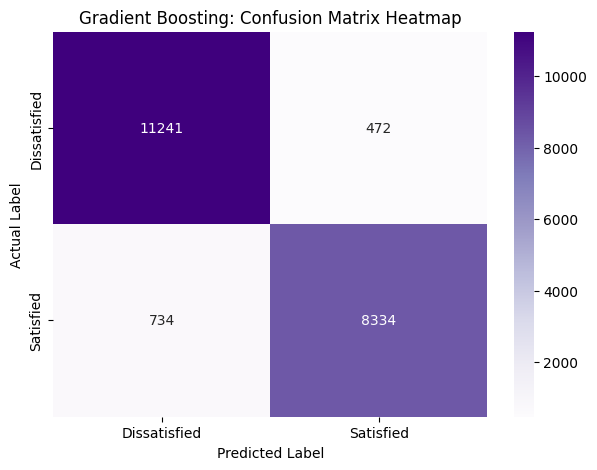

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Gradient Boosting: Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

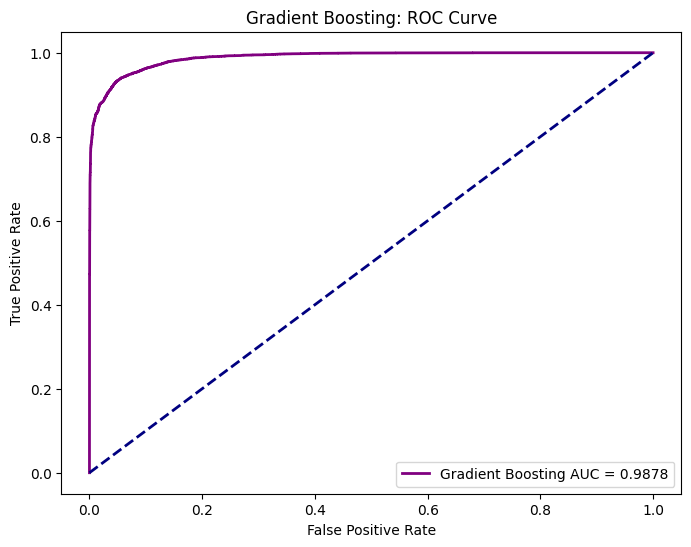

In [ ]:
from sklearn.metrics import roc_curve, auc

# 1. Get probabilities
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC and AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'Gradient Boosting AUC = {roc_auc_gb:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting: ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:

print(list(X_train.columns))


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

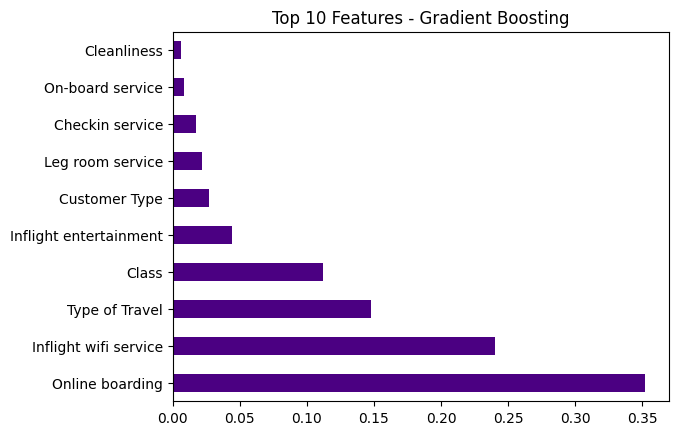

In [ ]:
# Quick code to show feature importance
feat_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='indigo')
plt.title('Top 10 Features - Gradient Boosting')
plt.show()

**Model Evaluation**

Metrics Used :

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix

Random Forest achieved the best balance between accuracy and recall

**Hyperparameter Tuning & Pipeline**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define a wider range but let the computer pick only 10 combinations
param_dist = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

# n_iter=10 means it will only try 10 random combinations
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=1)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best Params:", random_search.best_params_)

**Save the Model**

In [ ]:
import pickle

# Save the best model from your RandomizedSearch
with open('airline_pipeline.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Download 'airline_pipeline_yah.pkl' to your computer now.")

In [ ]:
from google.colab import files
files.download('airline_pipeline.pkl')